In [39]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display
import seaborn as sns

sns.set_style("darkgrid")


def phi1(x):
    return (x**2 + 2) / 3


def phi2(x):
    return np.sqrt(3 * x - 2)


def phi3(x):
    return 3 - 2 / x


def phi4(x):
    return (x**2 - 2) / (2 * x - 3)


phi = [phi1, phi2, phi3, phi4]
names = [r"$\phi_1(x)$", r"$\phi_2(x)$", r"$\phi_3(x)$", r"$\phi_4(x)$"]
alpha = 2
x0 = 3
iterations = 10
results = []

for i in range(len(phi)):
    x = x0
    history = [x]
    for _ in range(iterations):
        x = phi[i](x)
        history.append(x)
    results.append(history)


results_df = pd.DataFrame(
    {names[i]: results[i] for i in range(len(names))},
    index=[f"Iteration {i}" for i in range(len(results[0]))],
)


results_df = results_df.round(6)


print("Fixed point iteration results:")
display(results_df)

Fixed point iteration results:


,$\phi_1(x)$,$\phi_2(x)$,$\phi_3(x)$,$\phi_4(x)$
Iteration 0,3.000000e+00,3.000000,3.000000,3.000000
Iteration 1,3.666667e+00,2.645751,2.333333,2.333333
Iteration 2,5.148148e+00,2.436648,2.142857,2.066667
Iteration 3,9.501143e+00,2.304332,2.066667,2.003922
Iteration 4,3.075724e+01,2.216528,2.032258,2.000015
Iteration 5,3.160026e+02,2.156289,2.015873,2.000000
Iteration 6,3.328655e+04,2.113970,2.007874,2.000000
Iteration 7,3.693315e+08,2.083725,2.003922,2.000000
Iteration 8,4.546858e+16,2.061838,2.001957,2.000000
Iteration 9,6.891304e+32,2.045853,2.000978,2.000000


In [40]:
experimental_orders = []
for i, history in enumerate(results):
    errors = np.abs(np.array(history) - alpha)
    orders = []
    for k in range(1, len(errors) - 1):
        if i == 3 and k > 4:
            orders.append(np.nan)
            continue
        if errors[k] != 0 and errors[k - 1] != 0:
            r = np.log(errors[k + 1] / errors[k]) / np.log(errors[k] / errors[k - 1])
            orders.append(r)

    experimental_orders.append(orders)

orders_df = pd.DataFrame(
    {names[i]: experimental_orders[i] for i in range(len(names))},
    index=[f"Iteration {i + 1}" for i in range(len(experimental_orders[0]))],
)


orders_df = orders_df.round(4)


print("Experimental convergence orders:")
display(orders_df)

Experimental convergence orders:


,$\phi_1(x)$,$\phi_2(x)$,$\phi_3(x)$,$\phi_4(x)$
Iteration 1,1.2450,0.8947,0.7712,1.4650
Iteration 2,1.3652,0.9226,0.8995,1.7604
Iteration 3,1.5478,0.9429,0.9525,1.9586
Iteration 4,1.7789,0.9577,0.9769,1.9986
Iteration 5,1.9508,0.9686,0.9886,NaN
Iteration 6,1.9973,0.9766,0.9943,NaN
Iteration 7,2.0000,0.9826,0.9972,NaN
Iteration 8,2.0000,0.9870,0.9986,NaN
Iteration 9,2.0000,0.9903,0.9993,NaN


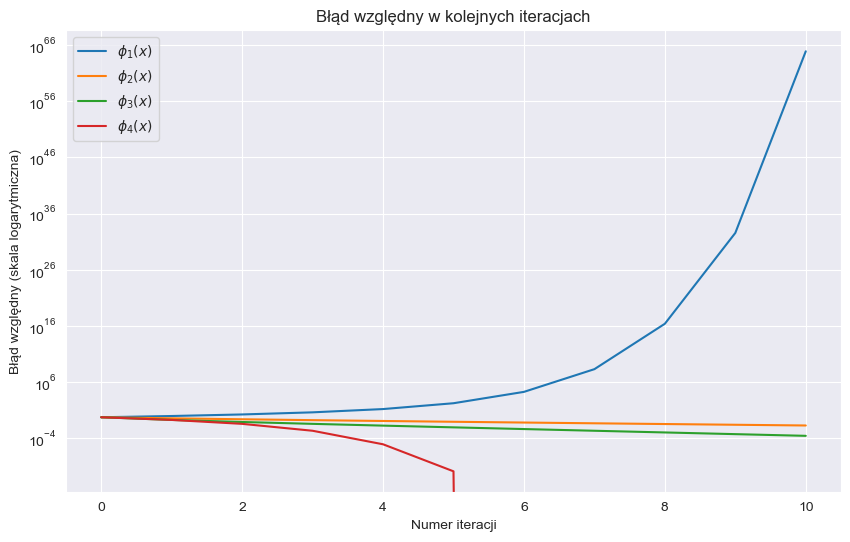

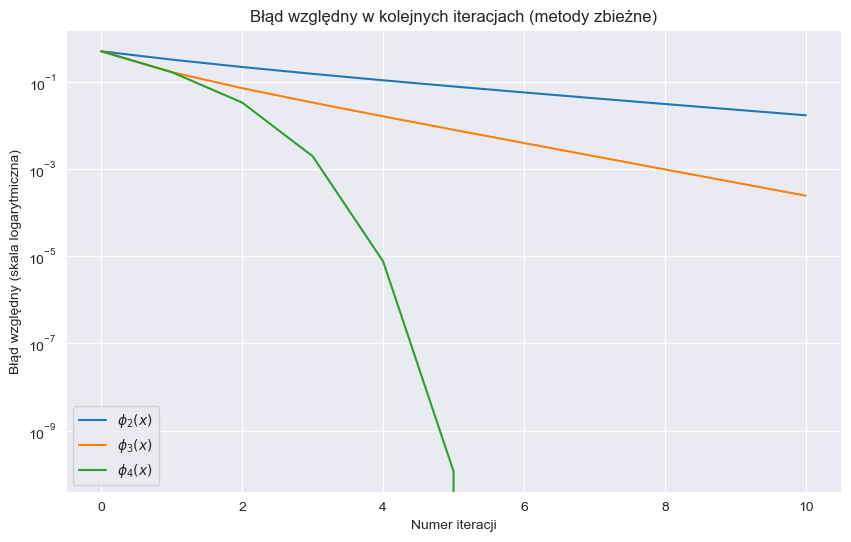

In [41]:
plt.figure(figsize=(10, 6))
for i, history in enumerate(results):
    errors_relative = np.abs((np.array(history) - alpha) / alpha)
    plt.semilogy(range(len(errors_relative)), errors_relative, label=names[i])
plt.xlabel("Numer iteracji")
plt.ylabel("Błąd względny (skala logarytmiczna)")
plt.title("Błąd względny w kolejnych iteracjach")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
for i, history in enumerate(results):
    errors_relative = np.abs((np.array(history) - alpha) / alpha)
    if i in [1, 2, 3]:
        plt.semilogy(range(len(errors_relative)), errors_relative, label=names[i])
plt.xlabel("Numer iteracji")
plt.ylabel("Błąd względny (skala logarytmiczna)")
plt.title("Błąd względny w kolejnych iteracjach (metody zbieżne)")
plt.legend()
plt.grid(True)
plt.show()